In [30]:
import torch
from torch import nn
import sys
from torch.utils.data import DataLoader, TensorDataset, Dataset

In [31]:
input = torch.randn(1, 256, 256, 5, 11)

In [32]:
s1 = nn.Conv3d(256, 64, 3)

In [33]:
o = s1(input)

In [34]:
o.shape

torch.Size([1, 64, 254, 3, 9])

## 2D Example covn

In [35]:
input2d = torch.randn(1, 1, 572, 572)

In [36]:
ss =nn.Conv2d(1, 64, 3, 1)

In [37]:
res2 = ss(input2d)

In [38]:
res2.shape

torch.Size([1, 64, 570, 570])

In [39]:
import sys
sys.path.append('../src/layers/')

In [40]:
sys.path.append('../src/ml_variants/unet/pipelines/training/steps/')
sys.path.append('../src/ml_variants/unet/pipelines/training')
sys.path.append('../src/')

In [41]:
from trainers import Sat2Rad

In [42]:
myModel = Sat2Rad().to('cuda', dtype=torch.float)

In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np
from util.parse_time import order_based_on_file_timestamp
from lightning.pytorch import Trainer

In [44]:
sat = os.listdir('../data/preprocessed/satellite/')
sat = order_based_on_file_timestamp(sat)

In [45]:
handcraftedSatellite = [np.load(os.path.join('../data/preprocessed/satellite/', x)) for x in sat[40:40+8]]

In [46]:
handcraftedSatellite

[array([[[0.6324587 , 0.63893433, 0.64109288, ..., 0.58281179,
          0.56338473, 0.55906754],
         [0.63677572, 0.64109288, 0.65188566, ..., 0.58281179,
          0.56338473, 0.55906754],
         [0.63677572, 0.64109288, 0.65188566, ..., 0.58281179,
          0.56338473, 0.59792167],
         ...,
         [0.2741374 , 0.26982029, 0.26550312, ..., 0.31946717,
          0.32594287, 0.32594287],
         [0.25471032, 0.25255176, 0.25039321, ..., 0.31946717,
          0.32594287, 0.32594287],
         [0.25471032, 0.25255176, 0.25039321, ..., 0.32594287,
          0.32810141, 0.33457714]],
 
        [[0.94732487, 0.94778045, 0.9440684 , ..., 0.91307779,
          0.90597591, 0.90671459],
         [0.93351009, 0.94117887, 0.94640658, ..., 0.91307779,
          0.90597591, 0.90671459],
         [0.93351009, 0.94117887, 0.94640658, ..., 0.91307779,
          0.90597591, 0.91706261],
         ...,
         [0.82791228, 0.82349214, 0.82573891, ..., 0.83404002,
          0.82791228, 0.

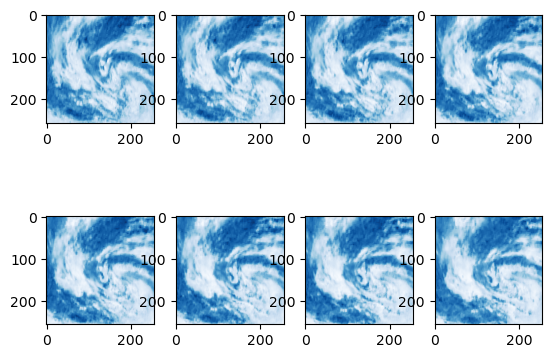

In [47]:
fig, axes = plt.subplots(2, 4)
axes[0][0].imshow(handcraftedSatellite[0][0], cmap="Blues")
axes[0][1].imshow(handcraftedSatellite[1][0], cmap="Blues")
axes[0][2].imshow(handcraftedSatellite[2][0], cmap="Blues")
axes[0][3].imshow(handcraftedSatellite[3][0], cmap="Blues")
axes[1][0].imshow(handcraftedSatellite[4][0], cmap="Blues")
axes[1][1].imshow(handcraftedSatellite[5][0], cmap="Blues")
axes[1][2].imshow(handcraftedSatellite[6][0], cmap="Blues")
axes[1][3].imshow(handcraftedSatellite[7][0], cmap="Blues")

In [48]:
handcraftedSatellite= np.array(handcraftedSatellite)

In [49]:
handcraftedSatellite = torch.from_numpy(handcraftedSatellite)
y = torch.randn(8, 10, 11, 256, 256)

In [50]:
handcraftedSatellite.shape

torch.Size([8, 11, 256, 256])

In [51]:
trainer = Trainer()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [55]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x.float(), self.y.float()
    
    def __len__(self):
        return 1

In [56]:
my_dataset = MyDataset(handcraftedSatellite, y)
my_dataloader = DataLoader(my_dataset) # create your dataloader

In [58]:
mi_outputo = trainer.predict(myModel, my_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

jelllooo
torch.Size([1, 8, 11, 256, 256])


In [64]:
mi_outputo[0].shape

torch.Size([1, 256, 256])

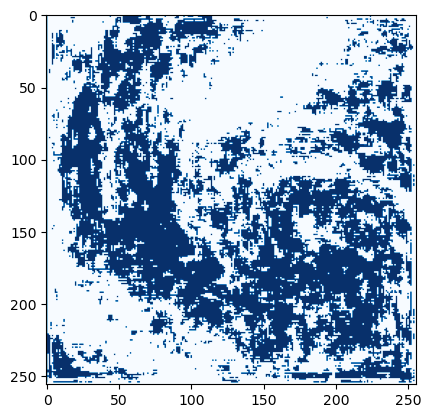

In [67]:
plt.imshow(mi_outputo[0].squeeze(), cmap="Blues")

In [ ]:
gt = 